In [56]:
# Dependencies Import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import json

**STEP: WEBPAGE REQUEST AND FETCH**

In [57]:
# Fetch movies list 
url = "https://www.imdb.com/chart/top/"
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

In [58]:
# Send request to extract data from IMDB website
request = requests.get(url, headers = headers)
if request.status_code == 200:
    print(f"Webpage fetch was successful. STATUS CODE: {request.status_code}")
else:
    print(f"Webpage fetch was not successful. STATUS CODE: {request.status_code}")

Webpage fetch was successful. STATUS CODE: 200


**STEP: PARSING THE HTML CONTENTS**
- I used beautifulsoup4 library to scrap contents from the web

In [59]:
soup = BeautifulSoup(request.text, 'html.parser')
#print(soup.prettify())

In [60]:
# scrapped movie name
movies = soup.find_all("li", class_="ipc-metadata-list-summary-item sc-4929eaf6-0 DLYcv cli-parent")
#print(movies)

**STEP: EXTRACTING RELEVANT MOVIE DETAILS**

In [61]:
# Initialize the list
movie_data=[]

# Looping through each movie from movies from and fetch relevant details.
for movie in movies:
    title = movie.find("h3", class_="ipc-title__text").text.split('.')[1]
    year = movie.find("div", class_="sc-732ea2d-5 kHnTQb cli-title-metadata").find_all("span")[0].text
    duration = movie.find("div", class_="sc-732ea2d-5 kHnTQb cli-title-metadata").find_all("span")[1].text
    movierating = movie.find("div", class_="sc-732ea2d-5 kHnTQb cli-title-metadata").find_all("span")[2].text
    userrating = movie.find("span", class_="ipc-rating-star--rating").text
    votecount = movie.find("span", class_="ipc-rating-star--voteCount").text

    movie_data.append({
        "MOVIE_TITLE": title,
        "MOVIE_YEAR": year,
        "MOVIE_DURATION": duration,
        "MOVIE_RATING": movierating,
        "USER_RATING": userrating,
        "NUM_VOTES": votecount        
    })      

In [62]:
# Push movie details into pandas dataframe
df1 = pd.DataFrame(movie_data)
df1.head()
#df = pd.concat([df2,df1], axis=1)
#df

,MOVIE_TITLE,MOVIE_YEAR,MOVIE_DURATION,MOVIE_RATING,USER_RATING,NUM_VOTES
0,The Shawshank Redemption,1994,2h 22m,R,9.3,(3M)
1,The Godfather,1972,2h 55m,R,9.2,(2.1M)
2,The Dark Knight,2008,2h 32m,PG-13,9.0,(2.9M)
3,The Godfather Part II,1974,3h 22m,R,9.0,(1.4M)
4,12 Angry Men,1957,1h 36m,Approved,9.0,(889K)


In [63]:
script_tag = soup.find('script', type='application/ld+json')
if script_tag:
    # Convert the JSON data (string) into a Python dictionary
    data = json.loads(script_tag.string)  
#data

In [64]:
descriptions = []
if 'itemListElement' in data:
    for item in data['itemListElement']:
        movie = item['item']
        descriptions.append(movie.get('description', 'N/A'))  # Movie description
df = pd.DataFrame({
    'DESCRIPTION': descriptions})
df2 = df[0:25]
df2

,DESCRIPTION
0,A banker convicted of uxoricide forms a friend...
1,The aging patriarch of an organized crime dyna...
2,When a menace known as the Joker wreaks havoc ...
3,The early life and career of Vito Corleone in ...
4,The jury in a New York City murder trial is fr...
5,Gandalf and Aragorn lead the World of Men agai...
6,"In German-occupied Poland during World War II,..."
7,"The lives of two mob hitmen, a boxer, a gangst..."
8,A meek Hobbit from the Shire and eight compani...
9,A bounty hunting scam joins two men in an unea...


In [65]:
df = pd.concat([df1,df2], axis=1)
df.head()

,MOVIE_TITLE,MOVIE_YEAR,MOVIE_DURATION,MOVIE_RATING,USER_RATING,NUM_VOTES,DESCRIPTION
0,The Shawshank Redemption,1994,2h 22m,R,9.3,(3M),A banker convicted of uxoricide forms a friend...
1,The Godfather,1972,2h 55m,R,9.2,(2.1M),The aging patriarch of an organized crime dyna...
2,The Dark Knight,2008,2h 32m,PG-13,9.0,(2.9M),When a menace known as the Joker wreaks havoc ...
3,The Godfather Part II,1974,3h 22m,R,9.0,(1.4M),The early life and career of Vito Corleone in ...
4,12 Angry Men,1957,1h 36m,Approved,9.0,(889K),The jury in a New York City murder trial is fr...


In [66]:
df.to_csv('IMDB_Scrappedmovies.csv', index=False) 
print("Initial scrapped movies data saved in CSV format")

Initial scrapped movies data saved in CSV format


**STEP: DATA CLEANING**
- Check for NaN or None value
- Check for missing values
- Check for duplicate values

In [67]:
# Check for NaN 
nan_counts = df.isna().sum()
nan_counts

MOVIE_TITLE       0
MOVIE_YEAR        0
MOVIE_DURATION    0
MOVIE_RATING      0
USER_RATING       0
NUM_VOTES         0
DESCRIPTION       0
dtype: int64

In [68]:
# Check for null values
null_counts = df.isnull().sum()
null_counts

MOVIE_TITLE       0
MOVIE_YEAR        0
MOVIE_DURATION    0
MOVIE_RATING      0
USER_RATING       0
NUM_VOTES         0
DESCRIPTION       0
dtype: int64

In [69]:
# Check for duplicate entries
duplicates = df.duplicated().sum()
duplicates

0

In [70]:
# Remove the brackets
df['NUM_VOTES'] = df['NUM_VOTES'].str.replace(r'[\[\]\(\)]', '', regex=True)
df.head()

,MOVIE_TITLE,MOVIE_YEAR,MOVIE_DURATION,MOVIE_RATING,USER_RATING,NUM_VOTES,DESCRIPTION
0,The Shawshank Redemption,1994,2h 22m,R,9.3,3M,A banker convicted of uxoricide forms a friend...
1,The Godfather,1972,2h 55m,R,9.2,2.1M,The aging patriarch of an organized crime dyna...
2,The Dark Knight,2008,2h 32m,PG-13,9.0,2.9M,When a menace known as the Joker wreaks havoc ...
3,The Godfather Part II,1974,3h 22m,R,9.0,1.4M,The early life and career of Vito Corleone in ...
4,12 Angry Men,1957,1h 36m,Approved,9.0,889K,The jury in a New York City murder trial is fr...


**STEP: DATA TRANSFORMATION**
- Convert K/M into its numerical equivalent
- Convert hour and minutes into minutes only

In [72]:
# Convert Number of votes: non numeric characters ('K' and 'M') to equivalent numerical representation
def convert_num_votes(votes):
    if isinstance(votes, str):
        votes = votes.strip().upper()  # Remove spaces and standardize to uppercase
        if 'K' in votes:
            votes = votes.replace('K', '')
            return float(votes) * 1000  # Convert 'K' to thousands
        elif 'M' in votes:
            votes = votes.replace('M', '')
            return float(votes) * 1000000  # Convert 'M' to millions
        else:
            # Remove any other non-numeric characters and convert to numeric
            votes = votes.replace(',', '').replace(' ', '')  
    return pd.to_numeric(votes, errors='coerce')  # Handle other cases like plain numbers

# Apply this function to the 'Audience Votes' column
df['NUM_VOTES'] = df['NUM_VOTES'].apply(convert_num_votes)
df.head()


,MOVIE_TITLE,MOVIE_YEAR,MOVIE_DURATION,MOVIE_RATING,USER_RATING,NUM_VOTES,DESCRIPTION
0,The Shawshank Redemption,1994,2h 22m,R,9.3,3000000.0,A banker convicted of uxoricide forms a friend...
1,The Godfather,1972,2h 55m,R,9.2,2100000.0,The aging patriarch of an organized crime dyna...
2,The Dark Knight,2008,2h 32m,PG-13,9.0,2900000.0,When a menace known as the Joker wreaks havoc ...
3,The Godfather Part II,1974,3h 22m,R,9.0,1400000.0,The early life and career of Vito Corleone in ...
4,12 Angry Men,1957,1h 36m,Approved,9.0,889000.0,The jury in a New York City murder trial is fr...


In [73]:
# Convert hours and minutes into minutes only
def convert_duration_tominutes(duration):
    if isinstance(duration, str):
        parts = duration.split()
        hours = int(parts[0][:-1])  # Remove 'h' and convert to int
        minutes = int(parts[1][:-1])  # Remove 'm' and convert to int
        return hours * 60 + minutes
        return tominutes
    return None
df['MOVIE_DURATION'] = df['MOVIE_DURATION'].apply(convert_duration_tominutes)
df.head()

,MOVIE_TITLE,MOVIE_YEAR,MOVIE_DURATION,MOVIE_RATING,USER_RATING,NUM_VOTES,DESCRIPTION
0,The Shawshank Redemption,1994,142,R,9.3,3000000.0,A banker convicted of uxoricide forms a friend...
1,The Godfather,1972,175,R,9.2,2100000.0,The aging patriarch of an organized crime dyna...
2,The Dark Knight,2008,152,PG-13,9.0,2900000.0,When a menace known as the Joker wreaks havoc ...
3,The Godfather Part II,1974,202,R,9.0,1400000.0,The early life and career of Vito Corleone in ...
4,12 Angry Men,1957,96,Approved,9.0,889000.0,The jury in a New York City murder trial is fr...


**TOKENIZATION**

In [74]:
def customtokenizer(text):
    # Lowercase the text
    text = text.lower()
    
    # Removing punctuation marks.
    punctuation = ['!', '.', ',', '?', ';', ':', '-', '(', ')', '[', ']', '{', '}', "'", '"']
    # Loop through each punctuation character and replace it with an empty string
    for p in punctuation:
        text = text.replace(p, "")    
    tokens = text.split()

    # Remove duplicates while preserving order
    seenwords = set()
    tokens2 = [token for token in tokens if not (token in seenwords or seenwords.add(token))]

    return tokens2

In [75]:
# Applying the custom tokenizer to the Movie Description column in df
df['TOKENS'] = df['DESCRIPTION'].apply(customtokenizer)
df.head()

,MOVIE_TITLE,MOVIE_YEAR,MOVIE_DURATION,MOVIE_RATING,USER_RATING,NUM_VOTES,DESCRIPTION,TOKENS
0,The Shawshank Redemption,1994,142,R,9.3,3000000.0,A banker convicted of uxoricide forms a friend...,"[a, banker, convicted, of, uxoricide, forms, f..."
1,The Godfather,1972,175,R,9.2,2100000.0,The aging patriarch of an organized crime dyna...,"[the, aging, patriarch, of, an, organized, cri..."
2,The Dark Knight,2008,152,PG-13,9.0,2900000.0,When a menace known as the Joker wreaks havoc ...,"[when, a, menace, known, as, the, joker, wreak..."
3,The Godfather Part II,1974,202,R,9.0,1400000.0,The early life and career of Vito Corleone in ...,"[the, early, life, and, career, of, vito, corl..."
4,12 Angry Men,1957,96,Approved,9.0,889000.0,The jury in a New York City murder trial is fr...,"[the, jury, in, a, new, york, city, murder, tr..."


**STEP: DATA VISUALIZATION**

Text(0, 0.5, 'MOVIE DURATION')

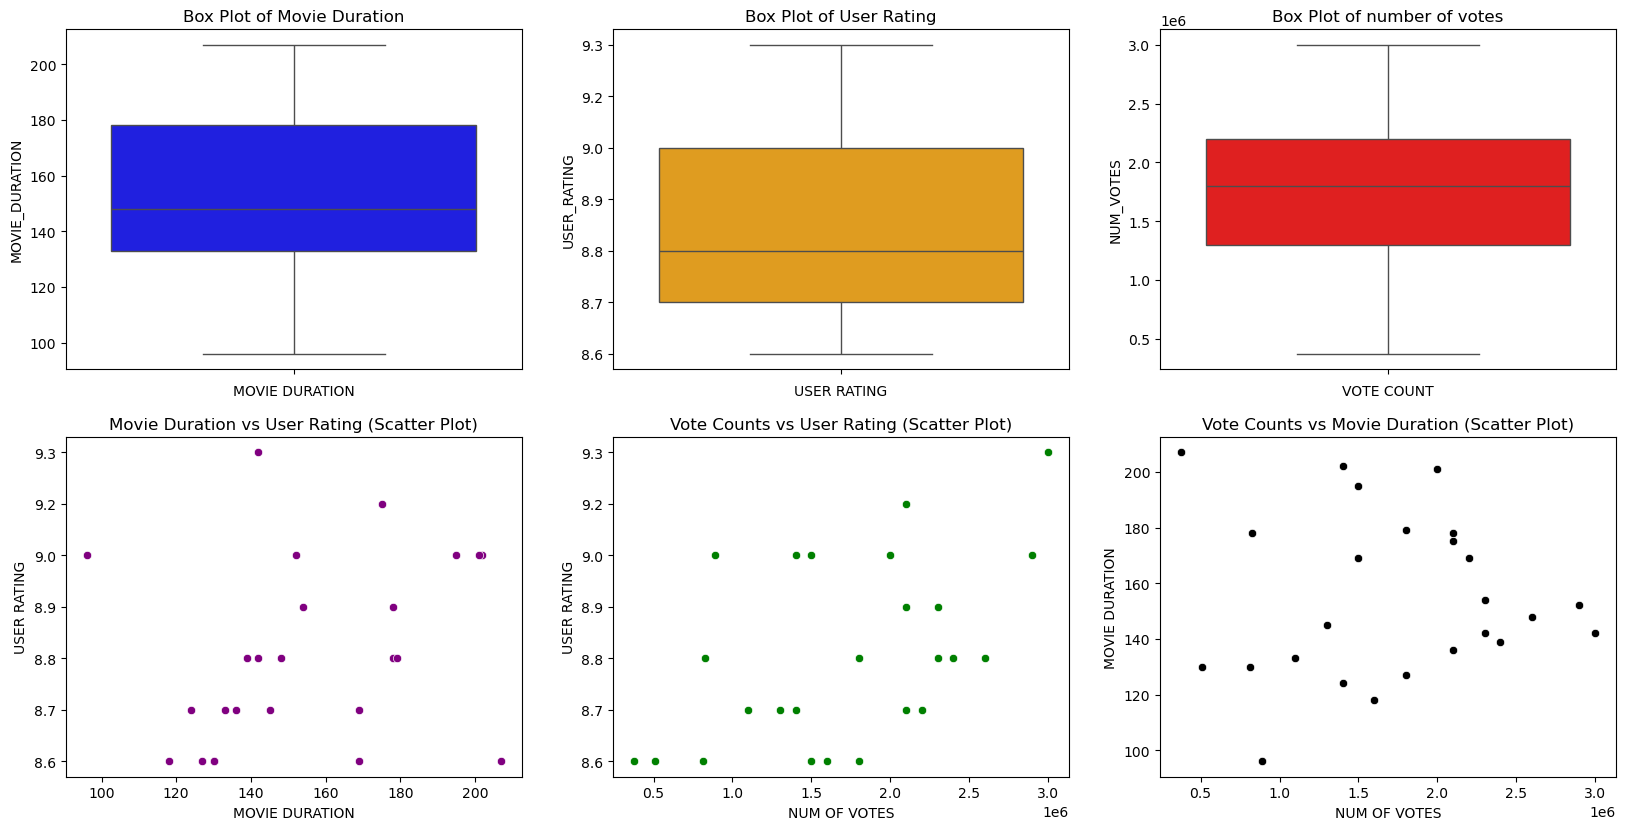

In [88]:
# Figure Size
plt.figure(figsize = (20,15))

plt.subplot(3,3,1)
sns.boxplot(df['MOVIE_DURATION'], color = 'blue')
plt.title('Box Plot of Movie Duration')
plt.xlabel('MOVIE DURATION')

# Box plot for User Rating
plt.subplot(3,3,2)
sns.boxplot(df['USER_RATING'], color = 'orange')
plt.title('Box Plot of User Rating')
plt.xlabel('USER RATING')

# Box plot for Number of Votes
plt.subplot(3,3,3)
sns.boxplot(df['NUM_VOTES'], color = 'red')
plt.title('Box Plot of number of votes')
plt.xlabel('VOTE COUNT')

# Scatter plot for User Rating and Movie Duration
plt.subplot(3, 3, 4)  
sns.scatterplot(x=df['MOVIE_DURATION'], y=df['USER_RATING'], color='purple')
plt.title('Movie Duration vs User Rating (Scatter Plot)')
plt.xlabel('MOVIE DURATION')
plt.ylabel('USER RATING')

# Scatter plot for User Rating and Number of Votes
plt.subplot(3, 3, 5)  
sns.scatterplot(x=df['NUM_VOTES'], y=df['USER_RATING'], color='green')
plt.title('Vote Counts vs User Rating (Scatter Plot)')
plt.xlabel('NUM OF VOTES')
plt.ylabel('USER RATING')

# Scatter plot for Movie Duration and Number of Votes
plt.subplot(3, 3, 6)  
sns.scatterplot(x=df['NUM_VOTES'], y=df['MOVIE_DURATION'], color='black')
plt.title('Vote Counts vs Movie Duration (Scatter Plot)')
plt.xlabel('NUM OF VOTES')
plt.ylabel('MOVIE DURATION')



    MOVIE_DURATION USER_RATING  NUM_VOTES
0              142         9.3  3000000.0
1              175         9.2  2100000.0
2              152         9.0  2900000.0
3              202         9.0  1400000.0
4               96         9.0   889000.0
5              201         9.0  2000000.0
6              195         9.0  1500000.0
7              154         8.9  2300000.0
8              178         8.9  2100000.0
9              178         8.8   828000.0
10             142         8.8  2300000.0
11             179         8.8  1800000.0
12             139         8.8  2400000.0
13             148         8.8  2600000.0
14             124         8.7  1400000.0
15             136         8.7  2100000.0
16             145         8.7  1300000.0
17             133         8.7  1100000.0
18             169         8.7  2200000.0
19             127         8.6  1800000.0
20             130         8.6   508000.0
21             207         8.6   374000.0
22             118         8.6  16

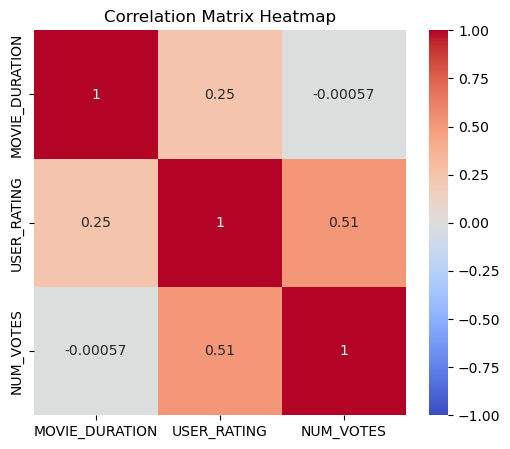

In [92]:
# Correlation Matrix Heatmap
df_reduced = df.filter(items=['MOVIE_DURATION', 'USER_RATING', 'NUM_VOTES'])
print(df_reduced)
correlation_matrix = df_reduced.corr()
plt.figure(figsize = (6,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()